### Analyse des données sur les logements Airbnb sur Paris: bénéfice, carte de chaleur, distribution des hotels, logements airbnb vs chambres d'hotel, les proprietaires

In [1]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
T = pd.read_csv('airbnb_paris.csv')

In [3]:
T.head()

Id   Id_Hote   Nom_Hote      Quartier   Latitude  Longitude  \
0  2788664   9024891      Jules  Ménilmontant  48.847907   2.401483   
1  2912397   7734570    Olivier  Ménilmontant  48.861348   2.401395   
2   830606   4350788  Catherine  Ménilmontant  48.862760   2.406240   
3  4434726   9846692      Julie  Ménilmontant  48.855482   2.403873   
4  6981068  12417393   Philippe  Ménilmontant  48.864844   2.401419   

              Type  Prix  Min_nuits Dernier_avis  Avis_par_mois  Disponibilite  
0  Entire_home/apt    55          3   2015-02-11           0.29            332  
1  Entire_home/apt    49          4   2015-08-22           3.36            171  
2  Entire_home/apt    50          2   2015-08-23           1.41            101  
3  Entire_home/apt    57          2   2015-07-07           1.88            349  
4  Entire_home/apt    45         14          NaN            NaN            365

In [4]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35428 entries, 0 to 35427
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             35428 non-null  int64  
 1   Id_Hote        35428 non-null  int64  
 2   Nom_Hote       30573 non-null  object 
 3   Quartier       35428 non-null  object 
 4   Latitude       35428 non-null  float64
 5   Longitude      35428 non-null  float64
 6   Type           35428 non-null  object 
 7   Prix           35428 non-null  int64  
 8   Min_nuits      35428 non-null  int64  
 9   Dernier_avis   25213 non-null  object 
 10  Avis_par_mois  25213 non-null  float64
 11  Disponibilite  35428 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [5]:
T['Duree'] = 12*T['Min_nuits']*T['Avis_par_mois']
T.head()

Id   Id_Hote   Nom_Hote      Quartier   Latitude  Longitude  \
0  2788664   9024891      Jules  Ménilmontant  48.847907   2.401483   
1  2912397   7734570    Olivier  Ménilmontant  48.861348   2.401395   
2   830606   4350788  Catherine  Ménilmontant  48.862760   2.406240   
3  4434726   9846692      Julie  Ménilmontant  48.855482   2.403873   
4  6981068  12417393   Philippe  Ménilmontant  48.864844   2.401419   

              Type  Prix  Min_nuits Dernier_avis  Avis_par_mois  \
0  Entire_home/apt    55          3   2015-02-11           0.29   
1  Entire_home/apt    49          4   2015-08-22           3.36   
2  Entire_home/apt    50          2   2015-08-23           1.41   
3  Entire_home/apt    57          2   2015-07-07           1.88   
4  Entire_home/apt    45         14          NaN            NaN   

   Disponibilite   Duree  
0            332   10.44  
1            171  161.28  
2            101   33.84  
3            349   45.12  
4            365     NaN

In [6]:
#Profit column (benefice)

T['benefice'] = T['Prix'] * T['Duree']

In [7]:
T.describe()

Id       Id_Hote      Latitude     Longitude          Prix  \
count  3.542800e+04  3.542800e+04  35428.000000  35428.000000  35428.000000   
mean   4.267450e+06  1.454641e+07     48.863487      2.342267    100.979028   
std    2.388210e+06  1.177517e+07      0.018743      0.034037     86.214473   
min    2.525000e+03  2.626000e+03     48.813911      2.222420     13.000000   
25%    2.081686e+06  4.517288e+06     48.849359      2.320642     59.000000   
50%    4.481972e+06  1.091783e+07     48.864521      2.345484     80.000000   
75%    6.388248e+06  2.317752e+07     48.879339      2.365812    115.000000   
max    8.192227e+06  4.321032e+07     48.901866      2.475516   3301.000000   

          Min_nuits  Avis_par_mois  Disponibilite         Duree      benefice  
count  35428.000000   25213.000000   35428.000000  25213.000000  2.521300e+04  
mean       2.917128       1.441293     226.758411     43.123887  4.279138e+03  
std        5.531840       1.338834     128.656189    132.325564  1.402960e+04  
min        1.000000       0.020000       0.000000      0.240000  1.080000e+01  
25%        1.000000       0.490000      93.000000     12.000000  9.110400e+02  
50%        2.000000       1.000000     274.000000     27.360000  2.241000e+03  
75%        3.000000       2.000000     338.000000     55.200000  4.968000e+03  
max      365.000000      13.000000     365.000000  16545.600000  1.654560e+06

- Le nombre d'avis par mois rensigne est de 644 sur 1000
- Non il exite des logment qui ne sont pa mis en location car ici le max de availability_365 est de 365
- La duree de location n'excede pas 365 jours car le max de Duration est de 257 jours

In [8]:
#Minimum profit
P = T.query('0< Duree <= Disponibilite')

In [9]:
list(P)

['Id',
 'Id_Hote',
 'Nom_Hote',
 'Quartier',
 'Latitude',
 'Longitude',
 'Type',
 'Prix',
 'Min_nuits',
 'Dernier_avis',
 'Avis_par_mois',
 'Disponibilite',
 'Duree',
 'benefice']

In [10]:
P.describe()

Id       Id_Hote      Latitude     Longitude          Prix  \
count  2.183900e+04  2.183900e+04  21839.000000  21839.000000  21839.000000   
mean   3.549014e+06  1.242378e+07     48.863362      2.343017    100.816292   
std    2.200020e+06  1.039185e+07      0.018217      0.032805     76.557177   
min    2.623000e+03  2.626000e+03     48.815494      2.233947     13.000000   
25%    1.427886e+06  3.943828e+06     48.850061      2.322695     60.000000   
50%    3.498135e+06  9.048835e+06     48.864202      2.346139     80.000000   
75%    5.498044e+06  1.899872e+07     48.878371      2.365154    115.000000   
max    8.113735e+06  4.284419e+07     48.900888      2.463759   1966.000000   

          Min_nuits  Avis_par_mois  Disponibilite         Duree       benefice  
count  21839.000000   21839.000000   21839.000000  21839.000000   21839.000000  
mean       2.636018       1.353589     261.284399     36.304146    3740.167154  
std        2.217640       1.277359      99.389709     35.304894    5104.631389  
min        1.000000       0.020000       3.000000      0.240000      10.800000  
25%        1.000000       0.460000     214.000000     11.760000     842.400000  
50%        2.000000       0.980000     300.000000     24.480000    2065.800000  
75%        3.000000       1.850000     338.000000     49.440000    4621.320000  
max      100.000000      10.870000     365.000000    342.000000  184017.600000

- Au minimum un logement rapporte par annee 10.8 euro

In [11]:
# Min profit by neighbourhood
D = P.groupby('Quartier')[['Quartier', 'benefice']].mean()
D

C:\Users\ProBook\AppData\Local\Temp\ipykernel_13748\3996878442.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D = P.groupby('Quartier')[['Quartier', 'benefice']].mean()


benefice
Quartier                        
Batignolles-Monceau  3035.002885
Bourse               5172.277187
Buttes-Chaumont      1845.423135
Buttes-Montmartre    2741.074808
Entrepôt             3406.593408
Gobelins             2485.679467
Hôtel-de-Ville       6757.360049
Louvre               6506.480787
Luxembourg           6390.998735
Ménilmontant         1729.580000
Observatoire         2374.844648
Opéra                3687.985792
Palais-Bourbon       5811.217849
Panthéon             4407.582793
Passy                3923.231738
Popincourt           3271.628844
Reuilly              2562.454804
Temple               5869.789857
Vaugirard            3140.575208
Élysée               5290.877739

Dans le quartier Batignolles-Monceau le benifice moyen minimum est de 3035.002885

In [12]:
P

Id   Id_Hote      Nom_Hote      Quartier   Latitude  Longitude  \
0      2788664   9024891         Jules  Ménilmontant  48.847907   2.401483   
1      2912397   7734570       Olivier  Ménilmontant  48.861348   2.401395   
2       830606   4350788     Catherine  Ménilmontant  48.862760   2.406240   
3      4434726   9846692         Julie  Ménilmontant  48.855482   2.403873   
6       701878   3239549      Frederic  Ménilmontant  48.862274   2.402995   
...        ...       ...           ...           ...        ...        ...   
35420  1120448   1862452     Catherine    Luxembourg  48.853603   2.343043   
35421  2605079  13228234    Evangeline    Luxembourg  48.856287   2.340763   
35424   150937    726874      Jonathan    Luxembourg  48.845581   2.331691   
35425  4990889   9134315  Jean-Edouard    Luxembourg  48.844086   2.331177   
35426   601053   2157959        Olivia    Luxembourg  48.856740   2.339274   

                  Type  Prix  Min_nuits Dernier_avis  Avis_par_mois  \
0      Entire_home/apt    55          3   2015-02-11           0.29   
1      Entire_home/apt    49          4   2015-08-22           3.36   
2      Entire_home/apt    50          2   2015-08-23           1.41   
3      Entire_home/apt    57          2   2015-07-07           1.88   
6         Private_room    60          1   2015-06-30           0.22   
...                ...   ...        ...          ...            ...   
35420  Entire_home/apt   155          3   2015-08-27           1.18   
35421  Entire_home/apt   195          3   2015-08-20           1.21   
35424  Entire_home/apt   350          3   2015-08-12           0.83   
35425     Private_room    75          2   2015-08-14           2.35   
35426  Entire_home/apt   119          2   2015-08-11           0.94   

       Disponibilite   Duree  benefice  
0                332   10.44    574.20  
1                171  161.28   7902.72  
2                101   33.84   1692.00  
3                349   45.12   2571.84  
6                269    2.64    158.40  
...              ...     ...       ...  
35420            184   42.48   6584.40  
35421            234   43.56   8494.20  
35424            323   29.88  10458.00  
35425            305   56.40   4230.00  
35426            312   22.56   2684.64  

[21839 rows x 14 columns]

In [13]:
import geopandas as gp

In [14]:
J = gp.read_file('paris.geojson')

In [15]:
J.head()

perimetre  surf_km2        quartier  ar  \
0   8282.011886  3.665442      Popincourt  11   
1  13678.798315  8.494994       Vaugirard  15   
2  11546.546526  7.149311        Gobelins  13   
3   4519.263648  1.170883          Temple   3   
4   8099.424883  4.090057  Palais-Bourbon   7   

                                            geometry  
0  POLYGON ((2.39624 48.85415, 2.39708 48.85308, ...  
1  POLYGON ((2.29932 48.85217, 2.30088 48.85118, ...  
2  POLYGON ((2.37491 48.83801, 2.37698 48.8361, 2...  
3  POLYGON ((2.36383 48.8675, 2.36389 48.86747, 2...  
4  POLYGON ((2.3209 48.86306, 2.32094 48.86305, 2...

In [16]:
# carte choroplete des benefices minnimum selon l'arrondissement de Paris

import plotly.express as px 

In [17]:
fig1 = px.choropleth(
    data_frame=D.reset_index(),
    locations='Quartier',
    geojson=J,
    featureidkey='properties.quartier',
    color='benefice',
    color_continuous_scale=[(0, 'rgb(250, 250,250)'),
                            (0.25, 'rgb(200, 200,200)'),
                            (0.5, 'rgb(150, 150,150)'),
                            (0.75, 'rgb(100, 100,100)'),
                            (1, 'rgb(50, 50, 50)')]
)

In [18]:
fig1.update_layout(
    coloraxis = {
        'colorbar' : {
            
                'len' : 0.7,
                'x': 0.95,
                'y' : 0.6,
                'title' : '<b>Benefice\moyen <br>  en(euro)\ <br> par logement </b>'
            
        }},
    title = {'text' : "Airbnb a Paris",
              'font' : {'family': 'comic sans MS',
                        'color': 'black'},
             'y': 0.9,
            'x': 0.1},
    showlegend = True
)

fig1.update_geos(
    fitbounds = 'locations', visible = False,
    projection = {'type': 'transverse mercator'}
)

#fig1.write_image('carte1_airbnb.svg')
fig1.show()

In [19]:
#Occupation par quartier

fig2 = px.density_mapbox(
    data_frame=P,
    lat='Latitude', lon='Longitude',
    radius=4,
    color_continuous_scale=[(0, 'black'),
                            (0.5, 'red'),
                            (1, 'black')],
opacity=0.5,
hover_name='Quartier'
)

In [20]:
fig2.update_layout(
    mapbox= {
        'style': "open-street-map",
        'center': {
            'lat': T['Latitude'].mean(),
            'lon': T['Longitude'].mean(),
            
        },
        'zoom': 11.4
    },
    coloraxis_showscale = False
)
fig2.show()

In [21]:
#Effectifs logements Airbnb par quartier :

N = P['Quartier'].value_counts()
N

Buttes-Montmartre      2396
Popincourt             1696
Vaugirard              1565
Batignolles-Monceau    1442
Entrepôt               1426
Passy                  1191
Buttes-Chaumont        1091
Panthéon               1067
Ménilmontant           1038
Opéra                   991
Observatoire            981
Luxembourg              917
Temple                  911
Reuilly                 843
Bourse                  839
Hôtel-de-Ville          818
Palais-Bourbon          753
Élysée                  690
Gobelins                676
Louvre                  508
Name: Quartier, dtype: int64

In [22]:
# Distribution des hotels par quartier 
H = pd.read_csv('hotels_paris.csv')

In [23]:
H.head()

nom_commercial  ar quartier  etoiles  nb_chambres        lat  \
0    HÔTEL LOUVRE MONTANA   1   Louvre        4           25  48.864480   
1  HÔTEL LOUVRE RICHELIEU   1   Louvre        3           13  48.866477   
2       RELAIS DES HALLES   1   Louvre        3           19  48.863213   
3   HÔTEL OPÉRA MAINTENON   1   Louvre        2           19  48.866795   
4              HÔTEL SNOB   1   Louvre        4           24  48.862409   

       long  
0  2.331768  
1  2.337195  
2  2.348910  
3  2.335859  
4  2.349543

In [24]:
# Table croisee

E = pd.crosstab(H['quartier'], H['etoiles'])
E

etoiles              1   2   3   4   5
quartier                              
Batignolles-Monceau  4  13  57  29   1
Bourse               1   3  17  16   1
Buttes-Chaumont      0  10  10   2   0
Buttes-Montmartre    2  13  20  12   0
Entrepôt             5  28  49  15   1
Gobelins             0  10  22   7   0
Hôtel-de-Ville       1   4  18   6   1
Louvre               0   6  21  25  14
Luxembourg           1   9  37  38   6
Ménilmontant         0   5  11   0   0
Observatoire         5  18  47  14   0
Opéra                2  21  88  43   7
Palais-Bourbon       0   4  28  20   4
Panthéon             1  14  35  20   0
Passy                0   4  28  25   8
Popincourt           1  17  34   8   1
Reuilly              1  16  34  10   0
Temple               0   3  10   8   1
Vaugirard            2  17  56  19   0
Élysée               1   6  37  56  32

C:\Users\ProBook\AppData\Local\Temp\ipykernel_13748\787827886.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



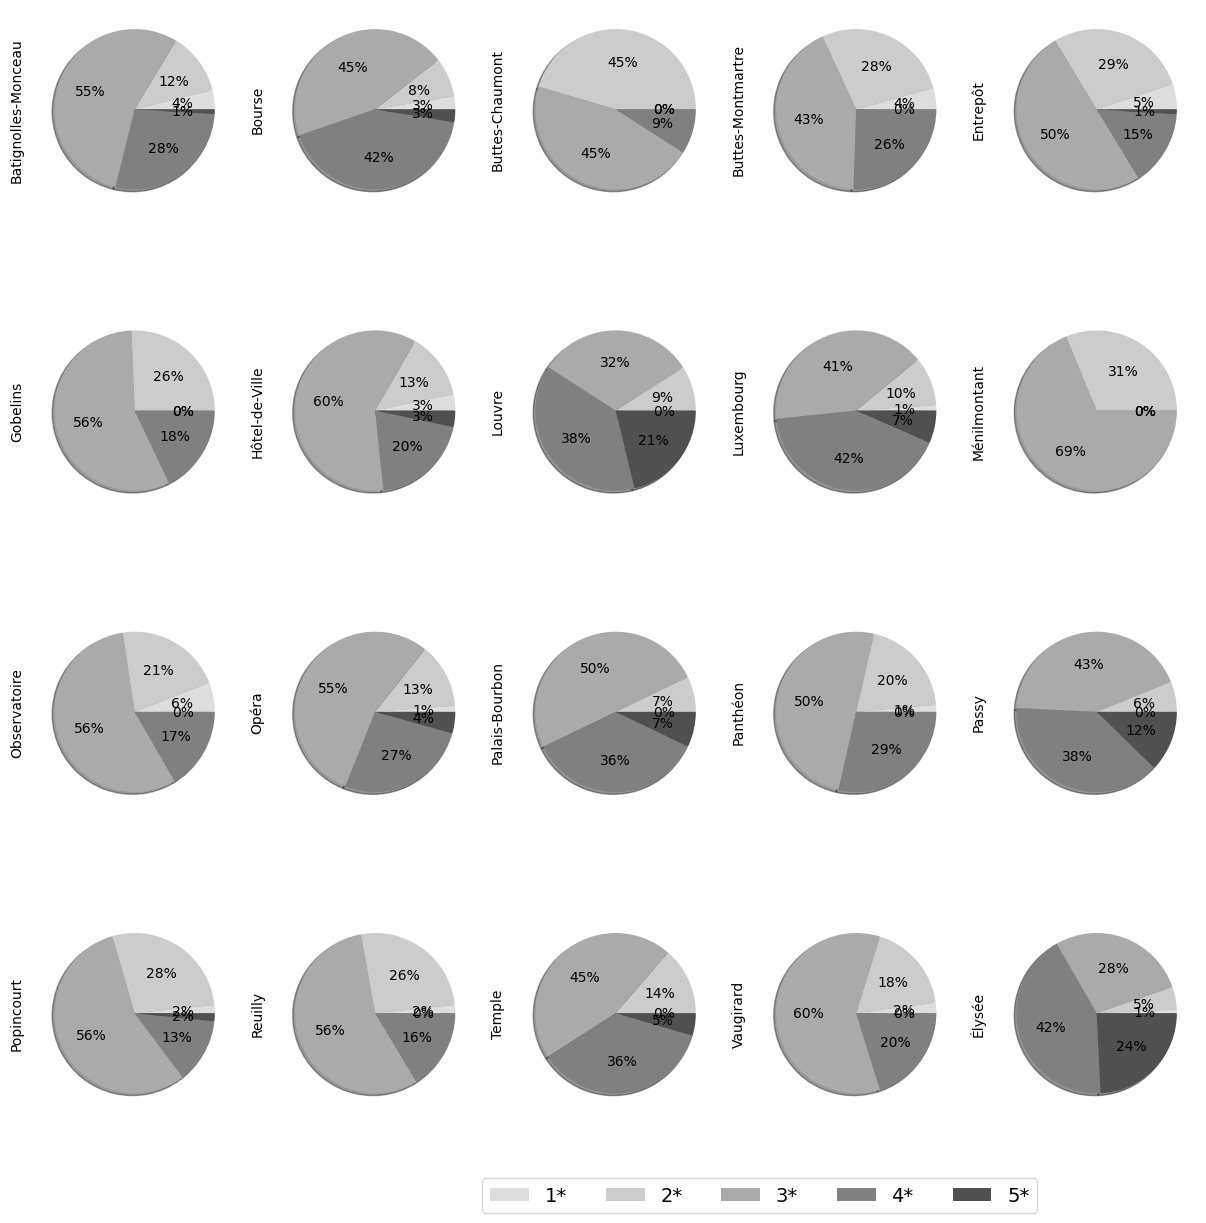

In [25]:
# Créer la figure
fig3, ax = plt.subplots(figsize=(15, 15))
E.T.plot.pie(
    ax = ax, legend = None,
    layout = (4,5), subplots= True,
    labeldistance = None,
    autopct = lambda x : str(round(x)) + '%',
    shadow = True,
    colors = ['#DDD', '#CCC', '#AAA', '#808080', '#505050'],
    labels  = range(1, 6)
)

fig3.legend(
    bbox_to_anchor = (0.8, 0.09),
    ncol = 6,
    fontsize = 14,
    labels = [str(k) +  '*' for k in range(1, 6)]
)


In [26]:
#Nombre de chmbre vs nombre de logements

C = H.groupby('quartier').sum()['nb_chambres']
C

C:\Users\ProBook\AppData\Local\Temp\ipykernel_13748\1600831965.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



quartier
Batignolles-Monceau    7035
Bourse                 1703
Buttes-Chaumont        2279
Buttes-Montmartre      2839
Entrepôt               4851
Gobelins               2020
Hôtel-de-Ville          817
Louvre                 3841
Luxembourg             3362
Ménilmontant            758
Observatoire           6182
Opéra                  7751
Palais-Bourbon         1961
Panthéon               2637
Passy                  2816
Popincourt             2901
Reuilly                4113
Temple                  801
Vaugirard              6218
Élysée                 8239
Name: nb_chambres, dtype: int64

In [27]:
# Effectif logement airbnb par quartier / Nombre de chambre d'hotel par quartier
R = (N/C).round(1)

In [28]:
R

Batignolles-Monceau    0.2
Bourse                 0.5
Buttes-Chaumont        0.5
Buttes-Montmartre      0.8
Entrepôt               0.3
Gobelins               0.3
Hôtel-de-Ville         1.0
Louvre                 0.1
Luxembourg             0.3
Ménilmontant           1.4
Observatoire           0.2
Opéra                  0.1
Palais-Bourbon         0.4
Panthéon               0.4
Passy                  0.4
Popincourt             0.6
Reuilly                0.2
Temple                 1.1
Vaugirard              0.3
Élysée                 0.1
dtype: float64

In [29]:
R_percent= (N/C).round(1) * 100

Le quartier Batignolles-Monceau compte 2 chambre airbnb pour 10 chambres d'hotels

In [30]:
#Nombre chambres airbnb par d'hotels 

for k in J.index:
    nom = J.loc[k, 'quartier']
    J.loc[k, 'ratio'] =R[nom]
    

In [31]:
J.head()

perimetre  surf_km2        quartier  ar  \
0   8282.011886  3.665442      Popincourt  11   
1  13678.798315  8.494994       Vaugirard  15   
2  11546.546526  7.149311        Gobelins  13   
3   4519.263648  1.170883          Temple   3   
4   8099.424883  4.090057  Palais-Bourbon   7   

                                            geometry  ratio  
0  POLYGON ((2.39624 48.85415, 2.39708 48.85308, ...    0.6  
1  POLYGON ((2.29932 48.85217, 2.30088 48.85118, ...    0.3  
2  POLYGON ((2.37491 48.83801, 2.37698 48.8361, 2...    0.3  
3  POLYGON ((2.36383 48.8675, 2.36389 48.86747, 2...    1.1  
4  POLYGON ((2.3209 48.86306, 2.32094 48.86305, 2...    0.4

In [32]:
# Amelioration de la carte choroplethe

Couleurs = {1 : 'blue', 2 : 'green', 3 : 'black', 4: 'linen', 5 : 'red'}

S = ['circle-open', 'diamond-x-open', 'triangle-down-open', 'square', 'star-triangle-up-dot']
r = [5, 5, 5, 5, 9]

for k in range(1, 6):
    A = H.query('etoiles == @k')
    fig1.add_scattergeo(
        lat= A['lat'],
        lon= A['long'],
        mode= 'markers',
        name=str(k) + ' etoiles',
        marker= {
            'size' : r[k - 1],
            'color' : Couleurs[k],
            'opacity' : 0.8,
            'symbol': S[k - 1],
            'line': {'width': 1.5}
        }
    )


fig1.update_layout(
    title = {
        'text': "Airbnb VS Hotels",
        'font': {'family': 'Verdana', 
                 'color': 'black'},
                 'y': 0.9,
                 'x': 0.1
    },
    legend = {
        'x': 0.75,
        'y': 0.92,
        'title': '<b>Nb etoiles </b>',
        'bordercolor': 'gray',
        'font': {'family': 'Verdana',
        'size' : 14},
        'borderwidth' : 2,
    }
)



fig1.show()

In [34]:
fig1.add_scattergeo(
    lat = J['geometry'].centroid.y,
    lon = J['geometry'].centroid.x - 0.005,
    mode = 'markers + text',
    marker = {'symbol' : 'square',
              'size' : 10,
              'opacity' : 1,
              'color' : 'linen'},
    text = J['ar'],
    textfont = {'color': 'black', 'size': 15,
    'family': 'Arial'},
    textposition = 'middle center',
    showlegend=False

)

fig1.show()

C:\Users\ProBook\AppData\Local\Temp\ipykernel_13748\196923455.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\ProBook\AppData\Local\Temp\ipykernel_13748\196923455.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [38]:
D.head()

benefice
Quartier                        
Batignolles-Monceau  3035.002885
Bourse               5172.277187
Buttes-Chaumont      1845.423135
Buttes-Montmartre    2741.074808
Entrepôt             3406.593408

In [36]:
fig1.add_scattergeo(
    lat = J['geometry'].centroid.y + 0.001,
    lon = J['geometry'].centroid.x + 0.005,
    mode = 'markers + text',
    marker = {'symbol' : 'square',
              'size' : 16,
              'opacity' : 1,
              'color' : 'orange'},
    text = J['ratio'],
    textfont = {'color': 'black', 'size': 15,
    'family': 'Arial'},
    textposition = 'middle center',
    showlegend=False

)

fig1.show()

C:\Users\ProBook\AppData\Local\Temp\ipykernel_13748\1279416903.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\ProBook\AppData\Local\Temp\ipykernel_13748\1279416903.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


